In [83]:
import pandas as pd

In [84]:
base = pd.read_excel(r'C:\Users\MARCOSVINICIUS\Documents\Aulas Pós\SAD\baseCefaleia5000_2.xlsx')

In [85]:
df = base 
df['CelfaleiaSimNao'] = 0
df['CelfaleiaTipo1SimNao'] = 0 #Sem Aurea 
df['CelfaleiaTipo2SimNao'] = 0 #Com Aurea
df['Celfaleia2TiposSimNao'] = 0 #Dois tipos
df['CefaleiaClassificacao'] = 0 #0 - Sem cefaleia 1- Tipo1 2- Tipo2 - 3 - Tipo1 ou tipo2

In [86]:
df.loc[
    (df['Tempo de Dor'] >= 240 ) & 
    (
        (df['Localizacao'] == 1) |  
        (df['Carater'] == 1) | 
        (df['Exacerbação'] == 1) | 
        (df['Intensidade'].isin([2,3])
    )) & 
    (
        (df['Náuseas'] == 1) | 
        (df['Fotofobia'] == 1)
    ), 
 'CelfaleiaTipo1SimNao'] = 1
 
#Aplicando o Critério do Livro para Cefaleia Cássica Com Aurea
df.loc[ 
    (df['Aura alastra-se gradualmente por 5 min ou mais'] == 1) &
    (
        (df['Tempo Aura visual']).between(5, 60, inclusive=False) | 
        (df['Tempo Aura Sensorial']).between(5, 60, inclusive=False) |
        (df['Tempo Aura Fala Linguagem']).between(5, 60, inclusive=False) |
        (df['Tempo Aura Motor']).between(5, 60, inclusive=False) |
        (df['Tempo Aura Tronco Cerebral']).between(5, 50, inclusive=False) | 
        (df['Tempo Aura Retiniano']).between(5, 60, inclusive=False)  
    ) & 
    (
        (df['Aura Unilateral'] == 1) | 
        (df['Aura Positivo'] == 1) | (df['Cefaleia'] == 1) |
        (df['Cefaleia acompanhada dentro de 60 min'] == 1)
    ),
'CelfaleiaTipo2SimNao'] = 1

#Se Qualquer dos indicadores forem verdadeiro , está caracterizada a cefaleia 
df.loc[(df['CelfaleiaTipo1SimNao'] == 1) | (df['CelfaleiaTipo2SimNao'] == 1)  , 'CelfaleiaSimNao'] = 1

#Avaliando Possibilidade de ser
df.loc[(df['CelfaleiaTipo1SimNao'] == 1) & (df['CelfaleiaTipo2SimNao'] == 1)  , 'Celfaleia2TiposSimNao'] = 1

In [87]:
#Aplicando classificação das categorias em um campo só  0 - Sem cefaleia 1- Tipo1 2- Tipo2 - 3 - Tipo1 ou tipo2
df.loc[(df['CelfaleiaSimNao'] == 0)   , 'CefaleiaClassificacao'] = 0
df.loc[(df['CelfaleiaSimNao'] == 1) & (df['CelfaleiaTipo1SimNao'] == 1) & (df['Celfaleia2TiposSimNao'] == 0) , 'CefaleiaClassificacao'] = 1
df.loc[(df['CelfaleiaSimNao'] == 1) & (df['CelfaleiaTipo2SimNao'] == 1) & (df['Celfaleia2TiposSimNao'] == 0) , 'CefaleiaClassificacao'] = 2
df.loc[(df['Celfaleia2TiposSimNao'] == 1)   , 'CefaleiaClassificacao'] = 3

In [88]:
print(df['CefaleiaClassificacao'].value_counts())

0    2049
1    1182
2    1135
3     634
Name: CefaleiaClassificacao, dtype: int64


In [89]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [90]:
X = df.drop(['Genero','CelfaleiaSimNao','CelfaleiaTipo1SimNao','CelfaleiaTipo2SimNao','Celfaleia2TiposSimNao','CefaleiaClassificacao'], axis=1)
X.head(3)

,Idade,Tempo de Dor,Localizacao,Carater,Intensidade,Exacerbação,Náuseas,Fotofobia,Tempo de Adormecimento Durante a Crise,alodinia cutânea,...,randomlistAH,ataxia não atribuível ao déficit sensorial,diminuição no nível da consciência,sintomas de migranea hemiplégica,Mutação no gene CACNA1A,Mutação no gene ATP1A2,Mutação no gene SCN1A,desenho do paciente de um defeito de campo monocular,exame clínico de campo visual,ProbCelfaleia
0,52,48,3,1,3,1,1,0,101,0,...,0,1,0,1,1,1,1,1,90,8
1,74,50,4,0,2,0,0,0,79,1,...,0,1,1,1,0,1,1,0,0,82
2,35,101,1,1,2,0,1,1,53,0,...,1,0,1,0,1,1,1,0,33,63


In [91]:
y = df['CefaleiaClassificacao'] 

In [92]:
liver_corr = X.corr()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(3500, 42)
(3500,)
(1500, 42)
(1500,)


In [94]:
import seaborn as sns

Logistic Regression Training Score: 
 70.23
Logistic Regression Test Score: 
 67.4
Coefficient: 
 [[ 1.38574558e-02 -8.54789866e-03  1.70863300e-01 -1.15002926e-01
  -2.62589428e-01 -1.22913702e-01 -6.63935464e-01 -6.67082148e-01
   1.79874030e-03  7.48872982e-02  9.82083673e-02 -1.43264230e-02
   5.65012393e-03  6.00129619e-03  4.70439132e-03  5.46307787e-03
   4.06548518e-03  5.44395242e-03 -2.32125735e+00 -1.23119540e-01
  -6.23179849e-02 -1.34610588e-01 -1.24327444e-01  7.89099303e-03
   3.79283432e-02  7.78780313e-02 -8.08140347e-02 -7.48070411e-02
  -8.68658085e-03 -9.97098829e-02  1.57765645e-01  1.63961251e-01
  -7.65807990e-02  1.57900523e-01  2.52355747e-02 -9.46033957e-02
   1.04318149e-01 -6.78400375e-02 -4.31847451e-02  1.15839410e-01
   6.87095267e-03  4.62565177e-03]
 [ 1.33839414e-03  1.01692642e-02 -6.42739552e-01 -1.00252358e-01
  -7.67756266e-02 -6.82899706e-03  4.68317057e-01  6.15130842e-01
   1.06473067e-03 -2.58138024e-01 -7.38231678e-03 -2.02431332e-01
   1.9525

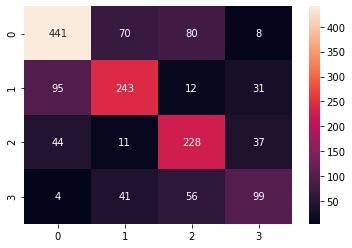

In [95]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [96]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Localizacao,0.170863
31,diplopia( alteração da posição dos olhos que c...,0.163961
33,ataxia não atribuível ao déficit sensorial,0.157901
30,hipoacusia(perda de audição),0.157766
39,desenho do paciente de um defeito de campo mon...,0.115839
36,Mutação no gene CACNA1A,0.104318
10,autonômico craniano,0.098208
25,Disartria(bilateral),0.077878
9,alodinia cutânea,0.074887
24,Disartria(unilateral),0.037928


Gaussian Score: 
 74.43
Gaussian Test Score: 
 74.33
Accuracy: 
 0.7433333333333333
[[418  59 114   8]
 [ 64 241  13  63]
 [  0   0 293  27]
 [  0   0  37 163]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.77       599
           1       0.80      0.63      0.71       381
           2       0.64      0.92      0.75       320
           3       0.62      0.81      0.71       200

    accuracy                           0.74      1500
   macro avg       0.73      0.77      0.74      1500
weighted avg       0.77      0.74      0.74      1500



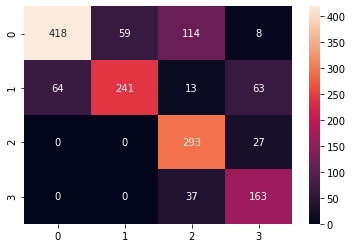

In [97]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

Random Forest Score: 
 100.0
Random Forest Test Score: 
 92.33
Accuracy: 
 0.9233333333333333
[[529  22  45   3]
 [  0 351   1  29]
 [  1   0 311   8]
 [  0   2   4 194]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       599
           1       0.94      0.92      0.93       381
           2       0.86      0.97      0.91       320
           3       0.83      0.97      0.89       200

    accuracy                           0.92      1500
   macro avg       0.91      0.94      0.92      1500
weighted avg       0.93      0.92      0.92      1500



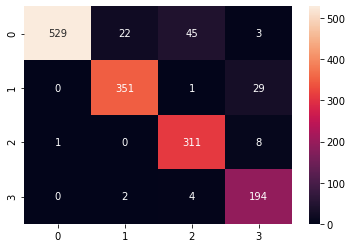

In [98]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

In [99]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Random Forest,100.00,92.33
1,Gaussian Naive Bayes,74.43,74.33
0,Logistic Regression,70.23,67.40


In [56]:
#x = df[['Tempo de Dor','Localizacao','Carater','Exacerbação','Intensidade','Náuseas','Fotofobia','Aura alastra-se gradualmente por 5 min ou mais','Tempo Aura visual','Tempo Aura Sensorial','Tempo Aura Fala Linguagem','Tempo Aura Motor','Tempo Aura Tronco Cerebral','Tempo Aura Retiniano','Aura Unilateral','Aura Positivo','Cefaleia acompanhada dentro de 60 min']] 
#y = df[['CelfaleiaSimNao','CelfaleiaTipo1SimNao','CelfaleiaTipo2SimNao']] 


In [100]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score = round(linear.score(X_train, y_train) * 100, 2)
linear_score_test = round(linear.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Linear Regression Score: \n', linear_score)
print('Linear Regression Test Score: \n', linear_score_test)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

from sklearn.feature_selection import RFE
rfe =RFE(linear, n_features_to_select=7)
rfe.fit(X,y)

Linear Regression Score: 
 60.88
Linear Regression Test Score: 
 60.28
Coefficient: 
 [-7.00171232e-05  2.19189256e-03 -8.70678958e-03  7.27333665e-02
  3.60342772e-02  7.06855634e-02  2.19604527e-01  2.33134408e-01
 -4.87526554e-04 -6.72451008e-03 -1.46266165e-02  3.27071350e-02
 -1.31451593e-03 -1.28176644e-03 -9.78551800e-04 -1.20093855e-03
 -7.09439563e-04 -1.19802084e-03  1.42874023e+00  7.74858546e-02
  6.82126808e-02  8.97109226e-02  9.75461140e-02  4.71018323e-02
 -2.57131394e-02  3.33620323e-03  9.50017021e-03  1.92747829e-02
 -3.81931215e-03  6.72311896e-02 -1.57863975e-02 -2.29125797e-02
  4.79541209e-03 -9.38843726e-04 -1.92806426e-02  3.85815810e-02
 -2.02477182e-03  4.01025980e-02  5.20467833e-04 -2.63356355e-02
 -4.09746230e-04 -1.83218196e-06]
Intercept: 
 0.1294684066224855


RFE(estimator=LinearRegression(), n_features_to_select=7)

In [101]:
for i in range(len(rfe.ranking_)):
    if rfe.ranking_[i] == 1:
        print(X.columns.values[i])

Carater
Exacerbação
Náuseas
Fotofobia
Aura alastra-se gradualmente por 5 min ou mais
Cefaleia
Cefaleia acompanhada dentro de 60 min


In [103]:
final_status = random_forest.predict_proba(X_test)


In [104]:
final_status

array([[0.83, 0.05, 0.12, 0.  ],
       [0.8 , 0.1 , 0.1 , 0.  ],
       [0.27, 0.04, 0.54, 0.15],
       ...,
       [0.14, 0.78, 0.02, 0.06],
       [0.21, 0.72, 0.03, 0.04],
       [0.23, 0.  , 0.73, 0.04]])

In [108]:
final_status[:,0]

array([0.83, 0.8 , 0.27, ..., 0.14, 0.21, 0.23])

In [111]:
final_status[:,1] + final_status[:,2]  + final_status[:,3]

array([0.17, 0.2 , 0.73, ..., 0.86, 0.79, 0.77])

In [124]:
#importando base nova para realizar o predict
BaseImput = pd.read_excel(r'C:\Users\MARCOSVINICIUS\Documents\Aulas Pós\SAD\baseCefaleia2500Prd.xlsx')

In [130]:
len(BaseImput)

2500

In [131]:
 X_input = BaseImput.drop(['Genero'], axis=1)
 len(X_input)

2500

In [134]:
  y_Prob = random_forest.predict_proba(X_input)
  y_output = random_forest.predict(X_input)

  print(len(y_Prob))
  print(len(y_output))

2500
2500


In [136]:
    BaseImput["CefaleiaNao"]= list(y_Prob[:,0])
    BaseImput["CefaleiaSim"] = list(y_Prob[:,1] + y_Prob[:,2]  + y_Prob[:,3])
    BaseImput["CefaleiaTipo1"] = list(y_Prob[:,1] ) 
    BaseImput["CefaleiaTipo2"] = list(y_Prob[:,2])
    BaseImput["Cefaleia2Tipos"] = list(y_Prob[:,3]) 

In [143]:
BaseImput["CefaleiaTipo1"] =  (BaseImput["CefaleiaTipo1"] * 100)/BaseImput["CefaleiaSim"]
BaseImput["CefaleiaTipo2"] =  (BaseImput["CefaleiaTipo2"] * 100)/BaseImput["CefaleiaSim"]
BaseImput["Cefaleia2Tipos"] =  (BaseImput["Cefaleia2Tipos"] * 100)/BaseImput["CefaleiaSim"]

In [144]:
   BaseImput["ClassificacaoCefaleia"] =   y_output  #Aplicando classificação das categorias em um campo só  0 - Sem cefaleia 1- Tipo1 2- Tipo2 - 3 - Tipo1 ou tipo2

In [145]:
BaseImput.to_excel('C:/Users/MARCOSVINICIUS/Documents/Aulas Pós/SAD/model_output.xlsx',columns=['Idade','Genero','Tempo de Dor','Localizacao','Carater','Exacerbação','Intensidade','Náuseas','Fotofobia','Aura alastra-se gradualmente por 5 min ou mais','Tempo Aura visual','Tempo Aura Sensorial','Tempo Aura Fala Linguagem','Tempo Aura Motor','Tempo Aura Tronco Cerebral','Tempo Aura Retiniano','Aura Unilateral','Aura Positivo','Cefaleia acompanhada dentro de 60 min','CefaleiaNao','CefaleiaSim','CefaleiaTipo1','CefaleiaTipo2','Cefaleia2Tipos','ClassificacaoCefaleia'])


In [ ]:
ScoreBase(BaseImput,random_forest)

In [128]:
 def ScoreBase(BaseInput,ObjetoTreinado):

    X_input = BaseInput.drop(['Genero'], axis=1)

    y_Prob = ObjetoTreinado.predict_proba(X_input)
    y_output = ObjetoTreinado.predict(X_input)


    BaseInput["CefaleiaNao"]= list(y_Prob[:,0])
    BaseInput["CefaleiaSim"] = list(y_Prob[:,1] + y_Prob[:,2]  + y_Prob[:,3])
    BaseInput["CefaleiaTipo1"] = list(y_Prob[:,1] )
    BaseInput["CefaleiaTipo2"] = list(y_Prob[:,2])
    BaseInput["Cefaleia2Tipos"] = list(y_Prob[:,3]) 

    BaseInput["ClassificacaoCefaleia"] =   y_output  #Aplicando classificação das categorias em um campo só  0 - Sem cefaleia 1- Tipo1 2- Tipo2 - 3 - Tipo1 ou tipo2

    BaseInput.to_excel('C:/Users/MARCOSVINICIUS/Documents/Aulas Pós/SAD/model_output.csv',columns=['Idade','Genero','Tempo de Dor','Localizacao','Carater','Exacerbação','Intensidade','Náuseas','Fotofobia','Aura alastra-se gradualmente por 5 min ou mais','Tempo Aura visual','Tempo Aura Sensorial','Tempo Aura Fala Linguagem','Tempo Aura Motor','Tempo Aura Tronco Cerebral','Tempo Aura Retiniano','Aura Unilateral','Aura Positivo','Cefaleia acompanhada dentro de 60 min','CefaleiaNao','CefaleiaSim','CefaleiaTipo1','CefaleiaTipo2','Cefaleia2Tipos','ClassificacaoCefaleia'])



Random Forest Score: 
 100.0
Random Forest Test Score: 
 92.33
Accuracy: 
 0.9233333333333333
[[529  22  45   3]
 [  0 351   1  29]
 [  1   0 311   8]
 [  0   2   4 194]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       599
           1       0.94      0.92      0.93       381
           2       0.86      0.97      0.91       320
           3       0.83      0.97      0.89       200

    accuracy                           0.92      1500
   macro avg       0.91      0.94      0.92      1500
weighted avg       0.93      0.92      0.92      1500



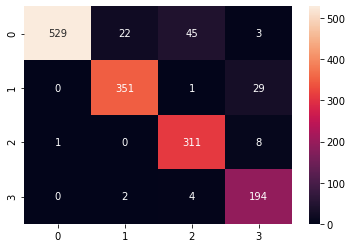

In [141]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted2 = random_forest.predict(X_input)



In [142]:
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_input, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted2))
print(confusion_matrix(y_test,rf_predicted2))
print(classification_report(y_test,rf_predicted2))

sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

ValueError: Found input variables with inconsistent numbers of samples: [1500, 2500]